<a href="https://colab.research.google.com/github/jayU000/bugbugcoding/blob/master/pythonbasic12_MachineLearning_titanic4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# G 드라이브 연결
from google.colab import drive
drive.mount('/gdrive/')

# 모듈 설정
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# https://dacon.io/competitions/open/235539/data

train = pd.read_csv('/gdrive/My Drive/Colab Notebooks/titanic/train.csv')
test = pd.read_csv('/gdrive/My Drive/Colab Notebooks/titanic/test.csv')
submission = pd.read_csv('/gdrive/My Drive/Colab Notebooks/titanic/submission.csv')

# 데이터 결합 (위 아래 방향으로 결합)

# 분석을 끝내고 학습을 시킬때 다시 분리 하기 편하도록 split  열을 만들어 각각 이름을 부여한다. 
train['Split'] = 'Train'
test['Split'] = 'Test'

data = pd.concat([train, test], axis=0)

data_num = data.loc[:,['Pclass','Age','SibSp','Parch','Fare','Survived']] 

# age  평균
data_num['Age'] = data_num['Age'].fillna(data_num['Age'].mean())

# fare 최빈
data_num['Fare'] = data_num['Fare'].fillna(data_num['Fare'].mode()[0])


Drive already mounted at /gdrive/; to attempt to forcibly remount, call drive.mount("/gdrive/", force_remount=True).


In [14]:
# 피처 엔지니어링 - 각 피처 열을 모델 학습에 맞게 전처리하고 data['Sex']
print(data['Sex'])

# female 0  male 1
data.loc[data['Sex']=='female','Sex'] = 0
data.loc[data['Sex']=='male','Sex'] = 1

print(data['Sex'])

# 정수형으로 형변환
data['Sex'] = data['Sex'].astype(int)
data['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 1309, dtype: object
0      1
1      0
2      0
3      0
4      1
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 1309, dtype: object


0      1
1      0
2      0
3      0
4      1
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 1309, dtype: int64

In [15]:
# Name
print(data['Name'])

# 시리즈 데이터형을 str로 변환하여 자르고 인덱싱
# title = title_name.str.split(",", expand=True)[0]         # 오류 발생 코드
                                                            # 오류 발생 원인 : "," -> 쉼표 뒤에 띄어쓰기가 빠졌음...

title_name = data['Name'].str.split(", ", expand=True)[1]
# 띄어 쓰기 주의... : 쉼표 뒤에 한칸 있음


# 시리즈 데이터형을 str로 변환하여 자르고 인덱싱
title = title_name.str.split(".", expand=True)[0]
print(title.value_counts(dropna=False))

# 비슷한 속성을 가진 타이틀 들을 그룹으로 묶자. 
title = title.replace(['Ms'], 'Miss')
title = title.replace(['Mlle', 'the Countess', 'Lady', 'Don', 'Dona', 'Mme', 'Sir', 'Jonkheer'], 'Noble')
title = title.replace(['Col', 'Major', 'Capt'], 'Officer')
title = title.replace(['Dr', 'Rev'], 'Priest')
data['Title'] = np.array(title)
print(data['Title'].value_counts(dropna=False))


# Title 열을 만들었으므로 필요 없어진 name 열은 삭제한다. 
data= data.drop('Name', axis=1)
data

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer     

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Split,Title
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,Train,Mr
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,Train,Mrs
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train,Miss
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,Train,Mrs
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,Train,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,1,NaN,0,0,A.5. 3236,8.0500,NaN,S,Test,Mr
414,1306,NaN,1,0,39.0,0,0,PC 17758,108.9000,C105,C,Test,Noble
415,1307,NaN,3,1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Test,Mr
416,1308,NaN,3,1,NaN,0,0,359309,8.0500,NaN,S,Test,Mr


In [19]:
# 나이대
bins = [0, 4, 8, 12, 16, 32, 36, 48, 56, 64, 100]
labels = ['Infant','Child1','Chind2','Youth1','Youth2','Adult1','Adult2','Middle Aged','Senior','Elderly']

data['AgeBin'] = pd.cut(data['Age'], bins=bins, labels=labels)
print(data)

data_ = data.loc[data['Split']=='Train', :]
data_.groupby('AgeBin')['Survived'].mean()

     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch  \
0              1       0.0       3    1  22.0      1      0   
1              2       1.0       1    0  38.0      1      0   
2              3       1.0       3    0  26.0      0      0   
3              4       1.0       1    0  35.0      1      0   
4              5       0.0       3    1  35.0      0      0   
..           ...       ...     ...  ...   ...    ...    ...   
413         1305       NaN       3    1   NaN      0      0   
414         1306       NaN       1    0  39.0      0      0   
415         1307       NaN       3    1  38.5      0      0   
416         1308       NaN       3    1   NaN      0      0   
417         1309       NaN       3    1   NaN      1      1   

                 Ticket      Fare Cabin Embarked  Split   Title  AgeBin  
0             A/5 21171    7.2500   NaN        S  Train      Mr  Youth2  
1              PC 17599   71.2833   C85        C  Train     Mrs  Adult2  
2      STON/O2. 31012

AgeBin
Infant         0.675000
Child1         0.642857
Chind2         0.266667
Youth1         0.483871
Youth2         0.369942
Adult1         0.479452
Adult2         0.356522
Middle Aged    0.466667
Senior         0.375000
Elderly        0.090909
Name: Survived, dtype: float64

In [20]:
# 요금에 1개의 결측치 처리

print(data.loc[data['Fare'].isnull(),:])

# 요금과 객실 등급의 상관 관계는 아주 높기 때문에 3등석 객실 승객의 탑승 요금의 평균값을 이용하여 
# 결측치를 채운다. 
# 중요한 점은 전체 요금의 평균값이 아닌 3등급만의 평균을 계산하여 채운다. 

p3_fare_mean = data.loc[data['Pclass']==3,'Fare'].mean()

data['Fare'] = data['Fare'].fillna(p3_fare_mean)

print(data.loc[data['Fare'].isnull(),:])

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Split, Title, AgeBin]
Index: []
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Split, Title, AgeBin]
Index: []


In [21]:
data.loc[data['Embarked'].isnull(),:]
data['Embarked'] = data['Embarked'].fillna('C')
print(data_.groupby('Embarked')['Survived'].mean())

data.loc[data['Ticket'].isnull(),:]
data['Ticket'] = data['Ticket'].fillna('C')
print(data_.groupby('Ticket')['Survived'].mean())


Embarked
C    0.558824
Q    0.389610
S    0.336957
Name: Survived, dtype: float64
Ticket
110152         1.000000
110413         0.666667
110465         0.000000
110564         1.000000
110813         1.000000
                 ...   
W./C. 6608     0.000000
W./C. 6609     0.000000
W.E.P. 5734    0.000000
W/C 14208      0.000000
WE/P 5735      0.500000
Name: Survived, Length: 681, dtype: float64


In [22]:
# 원핫 인코딩 # 
# 문자열 데이터를 숫자형 데이터로 변경하는 또 다른 방법 

# onehot_prefix = []
# for col in ['Title', 'AgeBin', 'Embarked']:
#   data[col] = data[col].astype('category')    # 그냥 문자열 데이터가 아닌 카테고리로 형변환 
#   data = pd.get_dummies(data, columns = [col], prefix = col[:3], drop_first= False)
#   onehot_prefix.append(col[:3])

# data_pre = data.loc[:, [col for col in data.columns if col[:3] in onehot_prefix]].head()
# # data= data.drop('Age', axis=1)
# # data
# data_pre


# 레이블 인코딩 label Encoding #
# 문자열 데이터로 이루어진 Title, AgeBin 을 숫자로 레이블로 바꿔주어야만 머신 러닝을 돌릴 수 있다. 

from sklearn.preprocessing import LabelEncoder

for col in ['Title', 'AgeBin', 'Embarked']:
  encoder = LabelEncoder()
  data[col] = encoder.fit_transform(data[col])

data.loc[:,['Title', 'AgeBin', 'Embarked']]

# 각 열에 속하는 범주의 개수만큼 숫자레이블로 변환해 준다. 

,Title,AgeBin,Embarked
0,2,9,2
1,3,1,0
2,1,9,2
3,3,0,2
4,2,0,2
...,...,...,...
413,2,10,2
414,4,1,0
415,2,1,2
416,2,10,2


In [24]:
# 피처 스케일링 - 모델 학습에 사용할 피처의 스케일을 0 ~ 1 범위로 정규화 처리한다. 
data_num = data.loc[:,['AgeBin','Title','Embarked','Survived','Pclass','Sex','Fare','Split','SibSp', 'Parch']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_cols = [col for col in data_num.loc[:, 'Pclass':]. columns if col != 'Split']
data_scaled = data_num.loc[:, scaled_cols]
data_scaled = scaler.fit_transform(data_scaled)

data_scaled

array([[1.        , 1.        , 0.01415106, 0.125     , 0.        ],
       [0.        , 0.        , 0.13913574, 0.125     , 0.        ],
       [1.        , 0.        , 0.01546857, 0.        , 0.        ],
       ...,
       [1.        , 1.        , 0.01415106, 0.        , 0.        ],
       [1.        , 1.        , 0.01571255, 0.        , 0.        ],
       [1.        , 1.        , 0.0436405 , 0.125     , 0.11111111]])

In [25]:
data_num.loc[:, scaled_cols] = data_scaled[:,:]
data_num

,AgeBin,Title,Embarked,Survived,Pclass,Sex,Fare,Split,SibSp,Parch
0,9,2,2,0.0,1.0,1.0,0.014151,Train,0.125,0.000000
1,1,3,0,1.0,0.0,0.0,0.139136,Train,0.125,0.000000
2,9,1,2,1.0,1.0,0.0,0.015469,Train,0.000,0.000000
3,0,3,2,1.0,0.0,0.0,0.103644,Train,0.125,0.000000
4,0,2,2,0.0,1.0,1.0,0.015713,Train,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...
413,10,2,2,NaN,1.0,1.0,0.015713,Test,0.000,0.000000
414,1,4,0,NaN,0.0,0.0,0.212559,Test,0.000,0.000000
415,1,2,2,NaN,1.0,1.0,0.014151,Test,0.000,0.000000
416,10,2,2,NaN,1.0,1.0,0.015713,Test,0.000,0.000000


In [26]:
selected_features = ['Pclass','AgeBin','Title','Embarked', 'SibSp', 'Parch','Pclass','Sex','Fare']

y_train = data_num.loc[data_num['Split']=='Train', 'Survived']
X_train = data_num.loc[data_num['Split']=='Train', selected_features]
X_test = data_num.loc[data_num['Split']=='Test', selected_features]

print('Train 데이터 셋 크기 : ', X_train.shape, y_train.shape)
print('Test 데이터 셋 크기 : ', X_test.shape)

Train 데이터 셋 크기 :  (891, 8) (891,)
Test 데이터 셋 크기 :  (418, 8)


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2,random_state=1)
columns = 'Pclass','Title','Sex','AgeBin','SibSp','Parch','Fare','Embarked','Title'
labels = 'alive','die'

In [52]:
X_tr, X_val, y_tr, y_val, columns, labels

(     AgeBin  Title  Embarked  SibSp  Parch  Pclass  Sex      Fare
 301      10      2         1   0.25    0.0     1.0  1.0  0.045381
 309       9      1         0   0.00    0.0     0.0  0.0  0.111118
 516       0      3         2   0.00    0.0     0.5  0.0  0.020495
 120       9      2         2   0.25    0.0     0.5  1.0  0.143462
 570       7      2         2   0.00    0.0     0.5  1.0  0.020495
 ..      ...    ...       ...    ...    ...     ...  ...       ...
 715       9      2         2   0.00    0.0     1.0  1.0  0.014932
 767       9      1         1   0.00    0.0     1.0  0.0  0.015127
 72        9      2         2   0.00    0.0     0.5  1.0  0.143462
 235      10      1         2   0.00    0.0     1.0  0.0  0.014737
 37        9      2         2   0.00    0.0     1.0  1.0  0.015713
 
 [712 rows x 8 columns],
      AgeBin  Title  Embarked  SibSp     Parch  Pclass  Sex      Fare
 862       1      3         2   0.00  0.000000     0.0  0.0  0.050610
 223      10      2         2

In [53]:
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [65]:
# X_tr, X_val, y_tr, y_val

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def draw_cm(model, X_val, y_val, labels, title=''):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_val, y_pred) # 혼돈 행렬 구하기
    ConfusionMatrixDisplay(cm, display_labels=labels).plot(cmap='Blues')
    
    if title: plt.title(title)
    plt.show()
    # 모델 평가 (ConfusionMatrix)

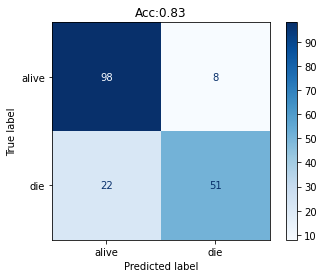

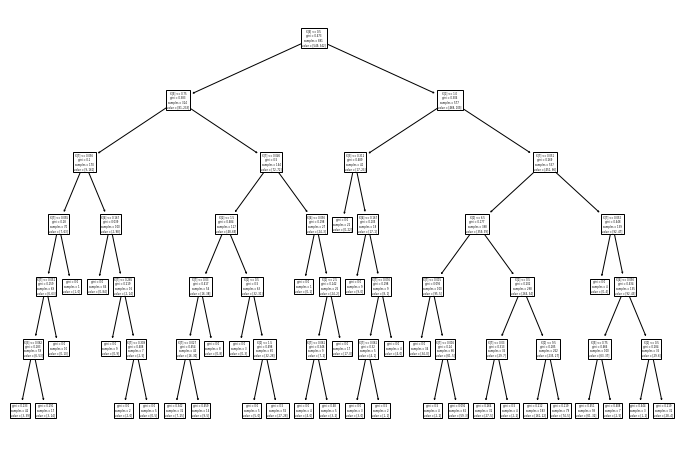

In [68]:
from sklearn.tree import DecisionTreeClassifier as DT 
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def draw_cm(model, X, y, labels, title=''):
  y_pred = model.predict(X)
  cm = confusion_matrix(y, y_pred) # 혼돈 행렬 구하기
  ConfusionMatrixDisplay(cm, display_labels=labels).plot(cmap='Blues')
  if title: plt.title(title)

# 학습
model = DT(criterion='gini', max_depth=6)
model.fit(X_train, y_train)

# 정확도 출력 및 혼돈행렬 시각화
acc = model.score(X_val, y_val)
draw_cm(model, X_val, y_val, labels, title = f'Acc:{np.round(acc,2)}')
plt.show()

# 트리 시각화
plt.figure(figsize=(12,8))
plot_tree(model)
plt.show()

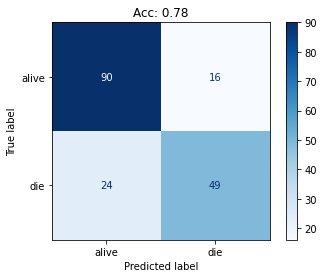

In [73]:
# SVC
from sklearn.svm import SVC

def draw_cm(model, X, y, labels, title=''):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y, y_pred) # 혼돈 행렬 구하기
  ConfusionMatrixDisplay(cm, display_labels=labels).plot(cmap='Blues')
  if title: plt.title(title)

# 학습
model = SVC(kernel='linear', random_state=1)
model.fit(X_val, y_val)

# 정확도 출력 및 혼돈행렬 시각화
draw_cm(model, X_val, y_val, labels, title=f'Acc: {np.round(model.score(X_val, y_val), 2)}')
plt.show()

In [27]:
# 훈련용과 검증용 8:2 로 분할

from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=20)


In [51]:
# voting
from sklearn.ensemble import VotingClassifier as Vot 
from sklearn.tree import DecisionTreeClassifier as DT 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier as KN   
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier as XGBC 

list_score = []

for i in range(1, 20):

  xgbc = XGBC(n_estimators=100, max_depth=i, random_state=10) 
  xgbc.fit(X_tr, y_tr) 

  rfc = RandomForestClassifier(n_estimators=100, max_depth=i, random_state=10) 
  rfc.fit(X_tr, y_tr)
  
  dtc = DT(max_depth=i, random_state = 10)
  dtc.fit(X_tr, y_tr)

  evc = Vot(estimators=[('XGBC', xgbc),('RFC', rfc),('DT', dtc)], voting='hard')   
  evc.fit(X_tr, y_tr) 

  # 예측 (시험)
  evc_pred = evc.predict(X_val)           
  evc_pred 

  # 평가
  from sklearn.metrics import accuracy_score  
  list_score.append(accuracy_score(y_val, evc_pred))

  print(f'max_depth={i} 평균 : {accuracy_score(y_val, evc_pred)}')

list_score.sort(reverse=True)
print(list_score)

max_depth=1 평균 : 0.770949720670391
max_depth=2 평균 : 0.7988826815642458
max_depth=3 평균 : 0.7988826815642458
max_depth=4 평균 : 0.7988826815642458
max_depth=5 평균 : 0.7988826815642458
max_depth=6 평균 : 0.7932960893854749
max_depth=7 평균 : 0.7932960893854749
max_depth=8 평균 : 0.7877094972067039
max_depth=9 평균 : 0.7821229050279329
max_depth=10 평균 : 0.7988826815642458
max_depth=11 평균 : 0.7877094972067039
max_depth=12 평균 : 0.7877094972067039
max_depth=13 평균 : 0.7821229050279329
max_depth=14 평균 : 0.770949720670391
max_depth=15 평균 : 0.776536312849162
max_depth=16 평균 : 0.776536312849162
max_depth=17 평균 : 0.7877094972067039
max_depth=18 평균 : 0.7877094972067039
max_depth=19 평균 : 0.7877094972067039
[0.7988826815642458, 0.7988826815642458, 0.7988826815642458, 0.7988826815642458, 0.7988826815642458, 0.7932960893854749, 0.7932960893854749, 0.7877094972067039, 0.7877094972067039, 0.7877094972067039, 0.7877094972067039, 0.7877094972067039, 0.7877094972067039, 0.7821229050279329, 0.7821229050279329, 0.7765363

In [37]:
xgbc = XGBC(n_estimators=100, max_depth=i, random_state=10) 
xgbc.fit(X_tr, y_tr) 

rfc = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=10) 
rfc.fit(X_tr, y_tr)
  
dtc = DT(max_depth=2, random_state = 10)
dtc.fit(X_tr, y_tr)

evc = Vot(estimators=[('XGBC', xgbc),('RFC', rfc),('DT', dtc)], voting='hard')   
evc.fit(X_tr, y_tr) 

# 예측 (시험)
evc_pred = evc.predict(X_val)           
evc_pred 


SyntaxError: ignored

In [38]:
list_score = []

for i in range(20):
  xgbc = XGBC(n_estimators=100, max_depth=i, random_state=10) 
  xgbc.fit(X_tr, y_tr) 

  # 예측 (시험)
  xgbc_pred = xgbc.predict(X_val)           
  xgbc_pred 

  # 평가
  from sklearn.metrics import accuracy_score  
  list_score.append(accuracy_score(y_val, xgbc_pred))
  
  print(f'max_depth={i} 평균 : {accuracy_score(y_val, xgbc_pred)}')

list_score.sort(reverse=True)
print(list_score)

XGBoostError: ignored

In [31]:
list_score = []

for i in range(1, 20):
  rfc = RandomForestClassifier(n_estimators=100, max_depth=i, random_state=10) 
  rfc.fit(X_tr, y_tr)

  # 예측 (시험)
  rfc_pred = rfc.predict(X_val)           
  rfc_pred 

  # 평가
  from sklearn.metrics import accuracy_score  
  list_score.append(accuracy_score(y_val, rfc_pred))

  print(f'max_depth={i} 평균 : {accuracy_score(y_val, rfc_pred)}')

list_score.sort(reverse=True)
print(list_score)

max_depth=1 평균 : 0.7821229050279329
max_depth=2 평균 : 0.8379888268156425
max_depth=3 평균 : 0.8547486033519553
max_depth=4 평균 : 0.8491620111731844
max_depth=5 평균 : 0.8491620111731844
max_depth=6 평균 : 0.8435754189944135
max_depth=7 평균 : 0.8435754189944135
max_depth=8 평균 : 0.8324022346368715
max_depth=9 평균 : 0.8379888268156425
max_depth=10 평균 : 0.8268156424581006
max_depth=11 평균 : 0.8156424581005587
max_depth=12 평균 : 0.8156424581005587
max_depth=13 평균 : 0.8212290502793296
max_depth=14 평균 : 0.8044692737430168
max_depth=15 평균 : 0.8044692737430168
max_depth=16 평균 : 0.8100558659217877
max_depth=17 평균 : 0.8044692737430168
max_depth=18 평균 : 0.8044692737430168
max_depth=19 평균 : 0.7988826815642458
[0.8547486033519553, 0.8491620111731844, 0.8491620111731844, 0.8435754189944135, 0.8435754189944135, 0.8379888268156425, 0.8379888268156425, 0.8324022346368715, 0.8268156424581006, 0.8212290502793296, 0.8156424581005587, 0.8156424581005587, 0.8100558659217877, 0.8044692737430168, 0.8044692737430168, 0.804

In [32]:
rfc = RandomForestClassifier(max_depth=None, max_features='auto') 
rfc.fit(X_tr, y_tr)

# 예측 (시험)
rfc_pred = rfc.predict(X_val)           
rfc_pred 

# 평가
from sklearn.metrics import accuracy_score  
accuracy_score(y_val, rfc_pred)


0.8268156424581006

In [33]:
list_score = []

for i in range(1, 20):
  knn = KN(n_neighbors=i) 
  knn.fit(X_tr, y_tr)     

  # 예측 (시험)
  knn_pred = knn.predict(X_val)           
  knn_pred 

  # 평가
  from sklearn.metrics import accuracy_score  
  list_score.append(accuracy_score(y_val, knn_pred))

  print(f'max_depth={i} 평균 : {accuracy_score(y_val, knn_pred)}')

list_score.sort(reverse=True)
print(list_score)

max_depth=1 평균 : 0.7932960893854749
max_depth=2 평균 : 0.7988826815642458
max_depth=3 평균 : 0.8156424581005587
max_depth=4 평균 : 0.8268156424581006
max_depth=5 평균 : 0.7877094972067039
max_depth=6 평균 : 0.8044692737430168
max_depth=7 평균 : 0.7988826815642458
max_depth=8 평균 : 0.8379888268156425
max_depth=9 평균 : 0.8491620111731844
max_depth=10 평균 : 0.8268156424581006
max_depth=11 평균 : 0.8212290502793296
max_depth=12 평균 : 0.8268156424581006
max_depth=13 평균 : 0.8212290502793296
max_depth=14 평균 : 0.8044692737430168
max_depth=15 평균 : 0.7988826815642458
max_depth=16 평균 : 0.7988826815642458
max_depth=17 평균 : 0.7988826815642458
max_depth=18 평균 : 0.8156424581005587
max_depth=19 평균 : 0.8100558659217877
[0.8491620111731844, 0.8379888268156425, 0.8268156424581006, 0.8268156424581006, 0.8268156424581006, 0.8212290502793296, 0.8212290502793296, 0.8156424581005587, 0.8156424581005587, 0.8100558659217877, 0.8044692737430168, 0.8044692737430168, 0.7988826815642458, 0.7988826815642458, 0.7988826815642458, 0.798

In [69]:
list_score = []

for i in range(1, 20):
  dtc = DT(criterion='gini', max_depth = i, random_state = 10)
  dtc.fit(X_tr, y_tr)

  # 예측 (시험)
  dtc_pred = dtc.predict(X_val)           
  dtc_pred 

  # 평가
  from sklearn.metrics import accuracy_score  
  list_score.append(accuracy_score(y_val, dtc_pred))

  print(f'max_depth={i} 평균 : {accuracy_score(y_val, dtc_pred)}')

list_score.sort(reverse=True)
print(list_score)

max_depth=1 평균 : 0.776536312849162
max_depth=2 평균 : 0.7206703910614525
max_depth=3 평균 : 0.8100558659217877
max_depth=4 평균 : 0.7988826815642458
max_depth=5 평균 : 0.7988826815642458
max_depth=6 평균 : 0.7541899441340782
max_depth=7 평균 : 0.7541899441340782
max_depth=8 평균 : 0.7374301675977654
max_depth=9 평균 : 0.7206703910614525
max_depth=10 평균 : 0.7206703910614525
max_depth=11 평균 : 0.7374301675977654
max_depth=12 평균 : 0.7486033519553073
max_depth=13 평균 : 0.7262569832402235
max_depth=14 평균 : 0.7150837988826816
max_depth=15 평균 : 0.7150837988826816
max_depth=16 평균 : 0.7430167597765364
max_depth=17 평균 : 0.7541899441340782
max_depth=18 평균 : 0.7430167597765364
max_depth=19 평균 : 0.7430167597765364
[0.8100558659217877, 0.7988826815642458, 0.7988826815642458, 0.776536312849162, 0.7541899441340782, 0.7541899441340782, 0.7541899441340782, 0.7486033519553073, 0.7430167597765364, 0.7430167597765364, 0.7430167597765364, 0.7374301675977654, 0.7374301675977654, 0.7262569832402235, 0.7206703910614525, 0.72067

In [44]:
xgbc = XGBC(n_estimators=100, max_depth=1, random_state=10) 
xgbc.fit(X_tr, y_tr) 

rfc = RandomForestClassifier(criterion='gini', max_depth=6, random_state=10) 
rfc.fit(X_tr, y_tr)
  
dtc = DT(max_depth=3, random_state = 10)
dtc.fit(X_tr, y_tr)

evc = Vot(estimators=[('XGBC', xgbc),('RFC', rfc),('DT', dtc)], voting='hard')   
evc.fit(X_tr, y_tr) 

# 예측 (시험)
evc_pred = evc.predict(X_val)           
evc_pred 

array([0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [40]:
xgbc = XGBC(n_estimators=100, max_depth=1, random_state=10) 
xgbc.fit(X_tr, y_tr) 

# 예측 (시험)
xgbc_pred = xgbc.predict(X_val)           
xgbc_pred 

# 평가
from sklearn.metrics import accuracy_score  
accuracy_score(y_val, xgbc_pred)

0.8715083798882681

In [48]:
X_train, X_test, y_train, y_test, columns, labels

NameError: ignored

In [43]:
# 제출용 파일 만들기

y_test_pred = xgbc.predict(X_test)
submission['Survived'] = y_test_pred.astype(int)

submission.to_csv('/gdrive/My Drive/Colab Notebooks/titanic/submission_0628_3.csv', index=False)